<a href="https://colab.research.google.com/github/TeAmP0is0N/Fake-News-Hindi/blob/master/Data%20Analysis/TwitterFakeAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import sys
sys.path.append('/gdrive/My Drive/IIITD Fake News Project/Notebooks/Data Analysis')

In [3]:
import re
import tweepy
import difflib
import pandas as pd
import numpy as np
import pickle
import time
import copy
import matplotlib.pyplot as plt
from datetime import date
from collections import Counter 

In [4]:
####input your credentials here
access_token = ""
access_token_secret = ""
consumer_key = ""
consumer_secret = ""

In [5]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [6]:
pd.options.display.max_colwidth = 0

In [7]:
### List of Hindi Stopwords

stopwords = []

file = open("/gdrive/My Drive/IIITD Fake News Project/Notebooks/Data Analysis/final_stopwords.txt", 'r')
for word in file:
    word = word.split("\n")[0]
    stopwords.append(word)

print("Total number of stopwords in Hindi are: ",len(stopwords))
print(stopwords)

Total number of stopwords in Hindi are:  264
['मैं', 'मुझको', 'मेरा', 'अपने आप को', 'हमने', 'हमारा', 'अपना', 'हम', 'आप', 'आपका', 'तुम्हारा', 'अपने आप', 'स्वयं', 'वह', 'इसे', 'उसके', 'खुद को', 'कि वह', 'उसकी', 'उसका', 'खुद ही', 'यह', 'इसके', 'उन्होने', 'अपने', 'क्या', 'जो', 'किसे', 'किसको', 'कि', 'ये', 'हूँ', 'होता है', 'रहे', 'थी', 'थे', 'होना', 'गया', 'किया जा रहा है', 'किया है', 'है', 'पडा', 'होने', 'करना', 'करता है', 'किया', 'रही', 'एक', 'लेकिन', 'अगर', 'या', 'क्यूंकि', 'जैसा', 'जब तक', 'जबकि', 'की', 'पर', 'द्वारा', 'के लिए', 'साथ', 'के बारे में', 'खिलाफ', 'बीच', 'में', 'के माध्यम से', 'दौरान', 'से पहले', 'के बाद', 'ऊपर', 'नीचे', 'को', 'से', 'तक', 'से नीचे', 'करने में', 'निकल', 'बंद', 'से अधिक', 'तहत', 'दुबारा', 'आगे', 'फिर', 'एक बार', 'यहाँ', 'वहाँ', 'कब', 'कहाँ', 'क्यों', 'कैसे', 'सारे', 'किसी', 'दोनो', 'प्रत्येक', 'ज्यादा', 'अधिकांश', 'अन्य', 'में कुछ', 'ऐसा', 'में कोई', 'मात्र', 'खुद', 'समान', 'इसलिए', 'बहुत', 'सकता', 'जायेंगे', 'जरा', 'चाहिए', 'अभी', 'और', 'कर दिया', 'रखें', 'क

In [9]:
df = pd.read_csv("/gdrive/My Drive/Masters/Non Duplicate Rohit - Sheet1.csv")
df

,Tweet ID,Tweet Text,Label,Reason,URL
0,1296379540730572801,"जो बिना समाचार पत्रों के प्रचार कर रहें हैं जी\n``सरकारी हैं तो डरने की कोई बात नहीं""\nदूसरों को भी बुलवाकर कर बताऐंगे।।",Fake,Sarcastic Nature,http://twitter.com/anyuser/status/1296379540730572801
1,1294871202893139969,"CCRAS,आयुष मंत्रालय भारत सरकार द्वारा 6 राज्यो मे चल रहे npcdcs के कार्यरत 500 युवा कर्मचारी का एक्सटेंशन मात्र 3महीने का तक ही दिया गया है\n31october को इतने कर्मचारियों\n को सरकार द्वारा बेरोजगार कर दिया जाएगा",Fake,Unverified source,http://twitter.com/anyuser/status/1294871202893139969
2,1265613003929587712,मुम्बई से मंडुवाडीह पहुंची श्रमिक स्पेशल ट्रेन में 2 लोग मृत मिले...😥.मोदी जी के सपनो का भारत,Fake,Emotionally Biased,http://twitter.com/anyuser/status/1265613003929587712
3,1296369286257111041,डिजिटल दिखाकर भारत की सारी सम्पत्ति बेच दिया अब स्कूल बंध करके भारत के फिर से गुलाम बनाने का प्लान तैयार है। Corona दिखाकर शिक्षा छीन लिया अब स्कूल बंध होगी। ईवीएम की नाजायज सरकार ने भारत को भिखारी ओर लाचार बनाया है,Fake,Emotionally Biased,http://twitter.com/anyuser/status/1296369286257111041
4,1295736719124307968,लोक डाउन Corona महामारी में भी मा.वामन मेश्राम साहेब नहीं रुके लोगो के अधिकार के लिए लगातार आंदोलन शुरू रखा है। भारत की जनता जाग चुकी है\nअपना अधिकार मांग रही है। लेकिन आरएसएस की मीडिया लगातार राम मंदिर के सिवा कुछ नहीं दिखा रही हैDown pointing backhand index\n#राममंदिर_का_पोस्टमार्टम,Fake,Emotionally Biased,http://twitter.com/anyuser/status/1295736719124307968
...,...,...,...,...,...
2255,1305143438803832832,कुछ साल पहले हम सोचते थे कि जिस रफ्तार से टेक्नोलॉजी बढ़ रही है 🤔\n\n 2020 आते आते कार उड़ेगी 😇\n\nपर यहां तो तोते उड़ गए !😳😲😲,Fake,sarcastic nature,http://twitter.com/anyuser/status/1305143438803832832
2256,1305140858635780098,RT @Komal_433: क्यो योगी जी ने 2800 का कोरोना किट 15800 में खरीदा????\n#योगी_का_कोरोना_घोटाला\n@ShilpiSinghINC,Fake,unverified source,http://twitter.com/anyuser/status/1305140858635780098
2257,1305140858635780098,क्यो योगी जी ने 2800 का कोरोना किट 15800 में खरीदा????\n#योगी_का_कोरोना_घोटाला\n@ShilpiSinghINC,Fake,unverified source,http://twitter.com/anyuser/status/1305140858635780098
2258,1305139885859250178,कंगना को अगर मुख्यमंत्री को 'तू' बोलने पर Y+ सुरक्षा दी जाती है।\nफिर तो मुझे Z++ देनी चाहिए थी। 😉 https://t.co/RTpNvMlSFG,Fake,sarcastic nature,http://twitter.com/anyuser/status/1305139885859250178


In [11]:
df['Reason'].value_counts()

Emotionally Biased         853
unverified source          728
sarcastic nature           283
supporting false claim     221
sarcastic Nature           44 
manipulated figures        33 
Sarcastic Nature           29 
personal gain              22 
Manipulated Figures        17 
Unverified source          11 
manipulated Figures        8  
supporting false claims    6  
spreading hate             3  
emotionally Biased         2  
Name: Reason, dtype: int64

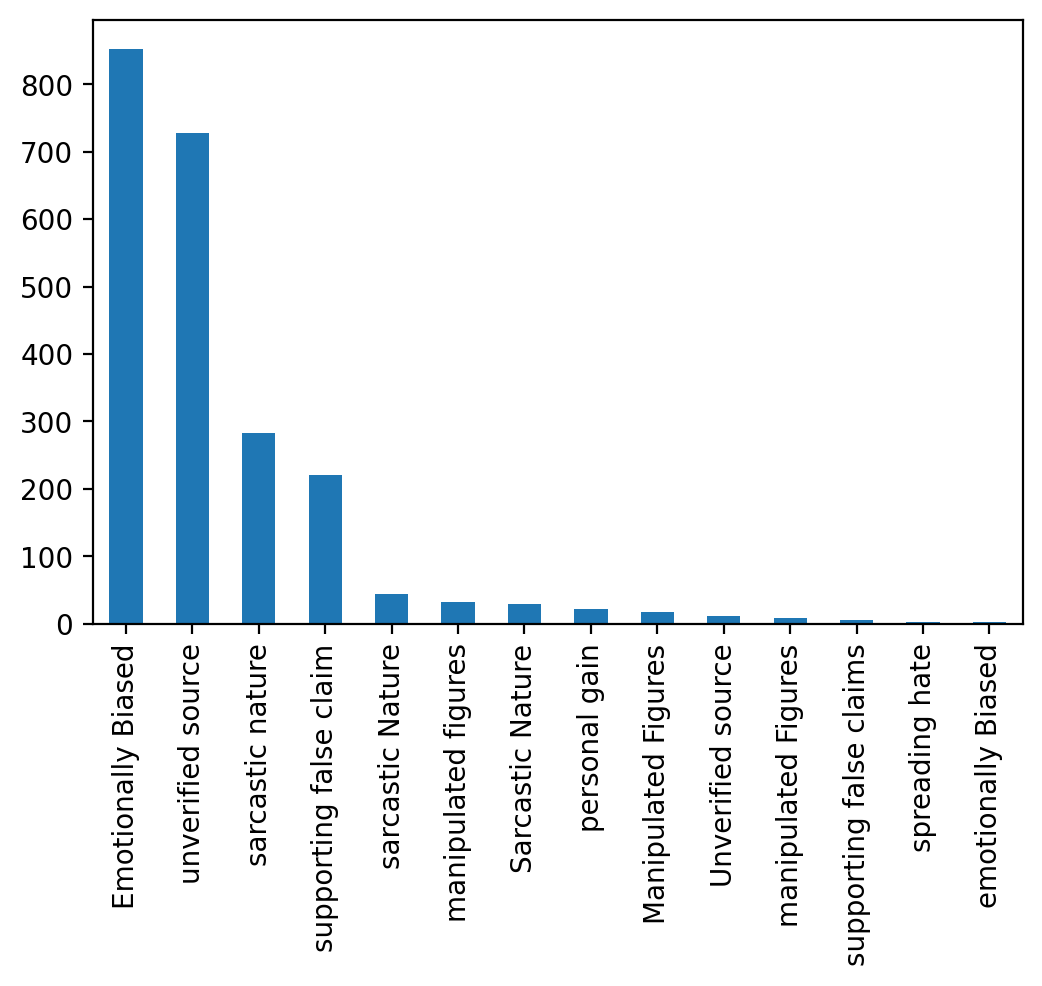

In [12]:
plt.figure(dpi=200)
df['Reason'].value_counts().plot(kind='bar')

In [13]:
puncs           = [',', '|', '?', '-', ':', '_', '!', ';', '"' ]
all_words       = []
not_stopwords   = []
hashtags        = []
user_mentions   = []
num_sentences   = 0
num_of_letters  = 0
num_of_puncs    = 0




for text in df['Tweet Text']:
    text = text.split()
    for word in text:
        
        all_words.append(word)

        if word not in stopwords:
            not_stopwords.append(word)
        
        if word[0] == '#':
            hashtags.append(word)
        
        if word[0] == '@':
            user_mentions.append(word)

        

        
        for letter in word:

            num_of_letters += 1

            if letter in puncs:
                num_of_puncs += 1
            
            if (letter == '|' or letter == '\n'):
                num_sentences += 1

In [14]:
print("The total number of words in the Corups are:           ",len(all_words))
print("The total number of non stopwords in the corpus are:   ", len(not_stopwords)) 
print("The total number of sentences in the Corups are:       ",num_sentences)
print("The total number of letters in the Corups are:         ",num_of_letters)
print("The total number of punctuations in the Corups are:    ",num_of_puncs)
print("The total number of hashtags in the Corups are:        ",len(hashtags))
print("The total number of user mentions in the Corups are:   ",len(user_mentions))

The total number of words in the Corups are:            59902
The total number of non stopwords in the corpus are:    39487
The total number of sentences in the Corups are:        69
The total number of letters in the Corups are:          251949
The total number of punctuations in the Corups are:     4314
The total number of hashtags in the Corups are:         991
The total number of user mentions in the Corups are:    636


In [15]:
print("The average number of words in a tweet are:           ",len(all_words)/len(df))
print("The average number of non stopwords in a tweet are:   ", len(not_stopwords)/len(df)) 
print("The average number of sentences in a tweet are:       ",num_sentences/len(df))
print("The average number of letters in a tweet are:         ",num_of_letters/len(df))
print("The average number of punctuations in a tweet are:    ",num_of_puncs/len(df))
print("The average number of hashtags in a tweet are:        ",len(hashtags)/len(df))
print("The average number of user mentions in a tweet are:   ",len(user_mentions)/len(df))

The average number of words in a tweet are:            26.505309734513276
The average number of non stopwords in a tweet are:    17.47212389380531
The average number of sentences in a tweet are:        0.030530973451327433
The average number of letters in a tweet are:          111.48185840707964
The average number of punctuations in a tweet are:     1.9088495575221238
The average number of hashtags in a tweet are:         0.43849557522123894
The average number of user mentions in a tweet are:    0.2814159292035398


In [16]:
top_words    = Counter(not_stopwords)
top_hashtags = Counter(hashtags)
top_users    = Counter(user_mentions)

print("The top 10 most frequent words are:     ",top_words.most_common(10))
print("The top 10 most frequent hashtags are:  ",top_hashtags.most_common(10))
print("The top 10 frequent user mentions are:  ",top_users.most_common(10))

The top 10 most frequent words are:      [('के', 1841), ('नहीं', 506), ('है।', 295), ('देश', 194), ('जी', 192), ('वायरल', 176), ('नही', 172), ('सरकार', 164), ('मोदी', 158), ('भारत', 150)]
The top 10 most frequent hashtags are:   [('#FakeNews', 51), ('#सर्वप्रिय_योगीजी', 27), ('#BOOMFactCheck', 23), ('#FactCheck', 21), ('#CBIForPalgharLynching', 15), ('#CBIForPalghar', 11), ('#राहुल_गांधी_मजदूरों_के_साथ', 10), ('#आमचीमुंबई', 10), ('#विकास_गायब_है', 10), ('#कोरोना', 9)]
The top 10 frequent user mentions are:   [('@_Pb_swain_:', 55), ('@KanganaTeam', 25), ('@RahulGandhi', 22), ('@sambitswaraj', 19), ('@narendramodi', 14), ('@INCIndia', 10), ('@myogiadityanath', 8), ('@DrRPNishank', 8), ('@BJP4India', 7), ('@Poojameena110:', 7)]
